In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime as dt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
load_df = pd.read_csv('eabr_news.csv', sep = ';', encoding = 'utf8', index_col=0)
load_df

,Title,Text,Date,Images
0,ЕАБР и ЗАО «АРМСВИСБАНК» договорились о развит...,"Ереван, 25 марта 2022 года. Евразийский банк р...",2022-03-25,[]
1,Директор ЕАБР по Республике Таджикистан обсуди...,"Душанбе, 23 февраля 2022 года. Директор ЕАБР п...",2022-02-23,[]
2,В приложении «Путешествую без COVID-19» стал д...,"Москва, 21 октября 2021 года. Фондом цифровых ...",2022-02-21,[]
3,ЕАБР открыл счета через расчетно-платежную инф...,"Ереван, 17 февраля 2022 года.\n\tВ Евразийском...",2022-02-17,[]
4,"ЕАБР помог 12 банкам-партнерам из Армении, Бел...","Алматы, 16 февраля 2022 года. По инициативе Ев...",2022-02-16,[]
...,...,...,...,...
70,Фонд цифровых инициатив ЕАБР на форуме ШОС пре...,"Душанбе, 6 сентября 2021 года. Фонд цифровых и...",2021-09-07,[]
71,Технологии фондовой биржи модернизируются за с...,"Ереван, 6 сентября\n\t2021 года. Делегация Евр...",2021-09-06,[]
72,ЕАБР и Газпромбанк договорились о развитии сот...,"Владивосток, 3 сентября 2021 года. Евразийский...",2021-09-03,[]
73,Заместитель председателя Правления ЕАБР Тигран...,"Владивосток, 2 сентября 2021 года.\n\tЗаместит...",2021-09-02,[]


In [3]:
#Анализируем частоту публикаций
news_df = load_df
news_df['Date'] = pd.to_datetime(news_df['Date'])
news_df.sort_values(by='Date', inplace = True)
row_cnt = news_df.shape[0]
days_cnt = (news_df.Date[0] - news_df.Date[row_cnt-1]).days + 1
print("Новости с", news_df.Date[row_cnt-1], "по", news_df.Date[0])
#количесвто выходных всего
date_tmp = news_df.Date[row_cnt-1]
all_holidays_cnt = 0
for i in range(0, days_cnt):
    if date_tmp.weekday() == 5 or date_tmp.weekday() == 6:
        all_holidays_cnt += 1
    date_tmp += dt.timedelta(days=1)
all_workdays_cnt = days_cnt - all_holidays_cnt
news_cnt = row_cnt
print("Количество дней:", days_cnt)
print("Количество рабочих дней:", all_workdays_cnt)
print("Количество выходных:", all_holidays_cnt)
print()
#количесвто выходных, когда были публикации
holidays = set()
workdays = set()
news_workdays = 0
news_holidays = 0
holiday_news = 0
for i in range(0, row_cnt):
    if news_df.Date[i].weekday() == 5 or news_df.Date[i].weekday() == 6:
        holidays.add(news_df.Date[i])
        news_holidays += 1
    else:   
        workdays.add(news_df.Date[i])
        news_workdays += 1
holidays_cnt = len(holidays)
workdays_cnt = len(workdays)
all_days = holidays_cnt + workdays_cnt
print("Количество дней, когда выходили новости:", all_days)
print("Количество рабочих дней, когда выходили новости:", workdays_cnt)
print("Количество выходных, когда выходили новости:", holidays_cnt)
print()
print("Количество новостей:", news_cnt)
print("Количество новостей, которые публиковались в будни:", news_workdays)
print("Количество новостей, которые публиковались в выходные:", news_holidays)

holidays_freq = news_holidays/all_holidays_cnt
workdays_freq = news_workdays/all_workdays_cnt
print()
print("Частота публикаций в будни:", workdays_freq)
print("Частота публикаций в выходные:", holidays_freq)
tmp_df = news_df.Date.value_counts()

Новости с 2021-09-02 00:00:00 по 2022-03-25 00:00:00
Количество дней: 205
Количество рабочих дней: 147
Количество выходных: 58

Количество дней, когда выходили новости: 56
Количество рабочих дней, когда выходили новости: 55
Количество выходных, когда выходили новости: 1

Количество новостей: 75
Количество новостей, которые публиковались в будни: 74
Количество новостей, которые публиковались в выходные: 1

Частота публикаций в будни: 0.5034013605442177
Частота публикаций в выходные: 0.017241379310344827


Вывод: На данном сайте публикации выходят достаточно редко, поэтому можно проверять наличие новых новостей один раз в 2 недели.

In [4]:
#Сгруппируем данные по дате, для построения графика
graph_df = load_df
graph_df['Date'] = pd.to_datetime(graph_df['Date'])
graph_df = graph_df.drop(columns=['Text', 'Images'])
graph_df = graph_df.groupby('Date').count()
graph_df.rename(columns = {"Title":"Count"}, inplace = True)
graph_df.head(5)

,Count
Date,
2021-09-02,2
2021-09-03,1
2021-09-06,1
2021-09-07,2
2021-09-08,2


<Figure size 1080x720 with 0 Axes>

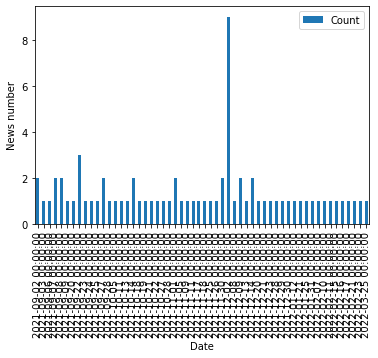

In [5]:
#Построим график выхода новостей
plt.figure(figsize=(15,10))
graph_df.plot.bar()
plt.xlabel("Date")
plt.ylabel("News number")
plt.show()

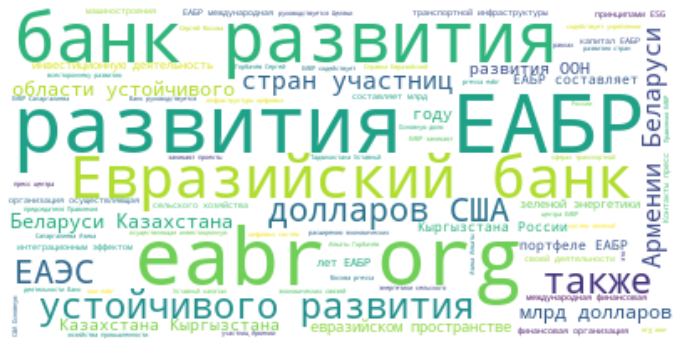

In [6]:
#Создание word cloud по текстам новостей
ru_stopwords = set(stopwords.words('russian'))
text = " ".join(text_item for text_item in load_df.Text)
wcloud = WordCloud(stopwords=ru_stopwords, background_color="white").generate(text) #создаём облако
wcloud.to_file("first_eabr.png") #сохраняем картинку
plt.figure(figsize = (12, 12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()